#颜色空间转换
import cv2
import numpy as np
import matplotlib.pyplot as plt
img=cv2.imread('../images/qipu.jpg')
img2=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
plt.subplot(121),plt.imshow(img)
plt.subplot(122),plt.imshow(img2)
plt.show()


#coding=utf-8  
import cv2  
import numpy as np  
#捕获视频图像  
camera = cv2.VideoCapture(0)  
#打开摄像头，将第一帧作为整个输入背景  
es = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (10,10))  
kernel = np.ones((5,5),np.uint8)  
background = None  
  
while (True):  
    ret, frame = camera.read()  
  #对背景帧进行灰度和平滑处理  
    if background is None:  
    background = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    background = cv2.GaussianBlur(background, (21, 21), 0)  
    continue  
  #将其他帧进行灰度处理和模糊平滑处理  
    gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)  
    gray_frame = cv2.GaussianBlur(gray_frame, (21, 21), 0)  
  
    diff = cv2.absdiff1(background, gray_frame)  
 
    diff = cv2.threshold(diff, 25, 255, cv2.THRESH_BINARY) 
    diff = cv2.dilate(diff, es, iterations = 2)  
  
  #显示矩形框，在计算出的差分图中找到所有的白色斑点轮廓，并显示轮廓  
    image, cnts, hierarchy = cv2.findContours(diff.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)  
    
    for c in cnts:  
        if cv2.contourArea(c) < 1500:  
            continue  
            (x, y, w, h) = cv2.boundingRect(c)  
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 255, 0), 2)  
    
cv2.imshow("contours", frame)  
cv2.imshow("dif", diff)  
if cv2.waitKey(1000 / 12) & 0xff == ord("q"):  
    break  
cv2.destroyAllWindows()  
camera.release()  


In [1]:
#扩展缩放
import cv2
import numpy as np

img=cv2.imread('/home/pzy/python/images/29.jpg')
#res=cv2.resize(img,None,fx=2,fy=2,interpolation=cv2.INTER_CUBIC)

height,width=img.shape[:2]
res=cv2.resize(img,(2*width,2*height),interpolation=cv2.INTER_CUBIC)
while(1):
    cv2.imshow('res',res)
    cv2.imshow('img',img)
    if cv2.waitKey(1)&0xFF==27:
        break
cv2.destroyAllWindows()

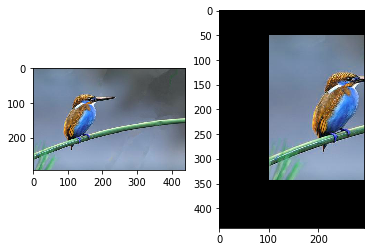

In [28]:
#平移：
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/home/pzy/python/images/29.jpg')
H = np.float32([[1,0,100],[0,1,50]])
rows,cols = img.shape[:2]
res = cv2.warpAffine(img,H,(rows,cols)) #需要图像、变换矩阵、变换后的大小
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res)


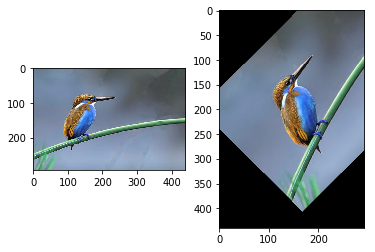

In [34]:
# 旋转 
import cv2
import matplotlib.pyplot as plt

img=cv2.imread('/home/pzy/python/images/29.jpg')
rows,cols = img.shape[:2]
#第一个参数旋转中心，第二个参数旋转角度，第三个参数：缩放比例
M = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
#第三个参数：变换后的图像大小
res = cv2.warpAffine(img,M,(rows,cols))

plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res)

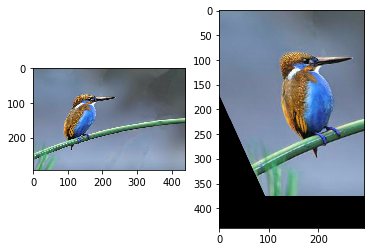

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/home/pzy/python/images/29.jpg')
rows,cols = img.shape[:2]
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,50],[200,50],[100,250]])
M = cv2.getAffineTransform(pts1,pts2)
#第三个参数：变换后的图像大小
res = cv2.warpAffine(img,M,(rows,cols))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res)

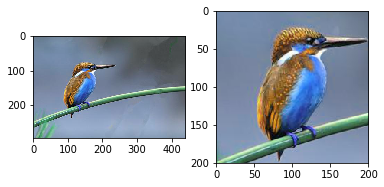

In [41]:
#图像的 透视变换
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/home/pzy/python/images/29.jpg')
rows,cols = img.shape[:2]
pts1 = np.float32([[56,65],[238,52],[28,237],[239,240]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])
M = cv2.getPerspectiveTransform(pts1,pts2)
res = cv2.warpPerspective(img,M,(200,200))
plt.subplot(121)
plt.imshow(img)
plt.subplot(122)
plt.imshow(res)